In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\Dip Sidpara\Downloads\Compressed\India_GDP(1960-2016)\India_GDP.csv",encoding='iso-8859-1')


In [5]:
df.head()

,Year,GDP
0,1960,6.840000e+11
1,1960,1.590000e+11
2,1961,1.680000e+11
3,1962,1.810000e+11
4,1963,1.760000e+11


In [6]:
plt.figure(figsize=(5,5))
x,y = (df["Year"].values, df["GDP"].values)


<Figure size 360x360 with 0 Axes>

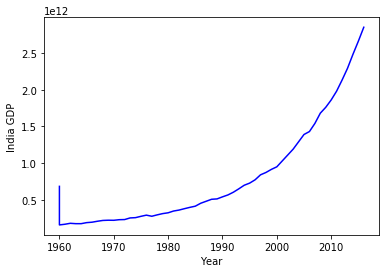

In [7]:
plt.plot(x,y,'b')
plt.ylabel('India GDP')
plt.xlabel('Year')
plt.show()

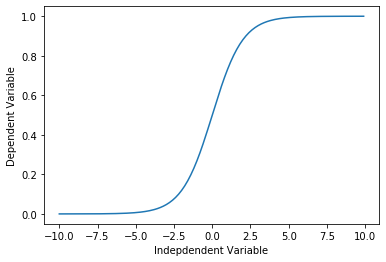

In [8]:
X = np.arange(-10.0, 10.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [9]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

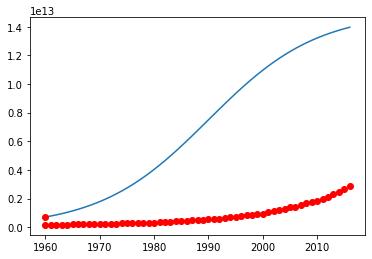

In [10]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x, beta_1 , beta_2)

plt.plot(x,Y_pred*15000000000000.)
plt.plot(x, y, 'ro')

In [11]:
# Lets normalize our data
xdata =x/max(x)
ydata =y/max(y)

In [12]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 216.370690, beta_2 = 0.993935


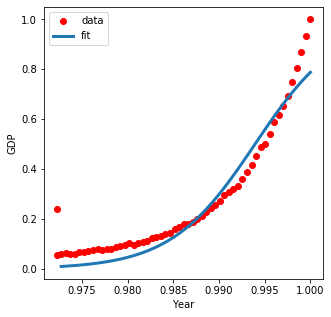

In [13]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(5,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [14]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.75
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))



Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00


In [15]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

R2-score: 0.97
